In [64]:
#检验EAGLE文章的figure6
import numpy as np 
import h5py
import matplotlib.pyplot as plt
N=256
showG=np.load('/data/dell5/userdir/hy/EAGLE_NEXUSw_256_'+"1"+'smooth_200914.npy')


In [66]:
#检验EAGLE文章的figure6
import numpy as np 
import h5py
import matplotlib.pyplot as plt
N=256
showG=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4fil_256_1.npy")
w=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4w_256_1.npy")
v=np.load("/data/dell5/userdir/heyi/Eaglecic/Rs1.6threshold0.4v_256_1.npy")
showG=showG.reshape(N,N,N)

In [67]:
r200=np.zeros([1])
mass=np.zeros([1])
pos=np.zeros([1,3])
GN=np.zeros([1])
SGN=np.zeros([1])
Vel=np.zeros([1,3])
starmass=np.zeros([1])

for i in np.arange(256):
    f = h5py.File('/Simulations/Eagle/RefL0100N1504/groups_028_z000p000/eagle_subfind_tab_028_z000p000.'+np.str(i)+'.hdf5', 'r')
    r200=np.concatenate((r200,f['FOF']['Group_R_Crit200']))

    pos=np.concatenate((pos,f['FOF']['GroupCentreOfPotential']))
    mass=np.concatenate((mass,f['FOF']['Group_M_Crit200']))
    GroupNumber=f["Subhalo"]["GroupNumber"]
    GN=np.concatenate((GN,GroupNumber))
    SubGroupNumber=f["Subhalo"]["SubGroupNumber"]
    SGN=np.concatenate((SGN,SubGroupNumber))
    Vel=np.concatenate((Vel,f["Subhalo"]["Velocity"])) 
    starmass=np.concatenate((starmass,f['Subhalo']['Stars']['Mass']))    
   
    
r200 = np.delete(r200, 0, 0)
Vel = np.delete(Vel, 0, 0)
pos = np.delete(pos,0,0)
mass = np.delete(mass,0,0)
GN = np.delete(GN,0,0)
SGN = np.delete(SGN,0,0)
starmass=np.delete(starmass,0,0)


main=np.int32(np.where(SGN==0))
GN=GN[main]
Vel=Vel[main] 
starmass=starmass[main]


GN=np.int32(GN-1)

GN=np.int32(GN)
r200=r200[GN]
pos=pos[GN]
mass=mass[GN] 


In [68]:
posround=np.rint(pos)
posround=posround.astype(np.int16)
showGww=showG[posround[0][:,0],posround[0][:,1],posround[0][:,2]]#把galaxy对应的环境取出来

number_clustergalaxy=np.where(showGww==3)#在cluster上的halo的序号
mass_cluster=mass[:,number_clustergalaxy].reshape(mass[:,number_clustergalaxy].shape[2])  #m200，4065为数据数量，减少冗余结构所以reshape

number_fg=np.where(showGww==2)
mass_fg=mass[:,number_fg].reshape(mass[:,number_fg].shape[2])

number_wg=np.where(showGww==1)
mass_wg=mass[:,number_wg].reshape(mass[:,number_wg].shape[2])

number_vg=np.where(showGww==0)
mass_vg=mass[:,number_vg].reshape(mass[:,number_vg].shape[2])

In [69]:
massstep=np.arange(9,14,0.2)
massstep2=np.arange(8.8,13.8,0.2)
deltamass=massstep-massstep2
L=67.77
def plotmass_n(mass):
    mass=mass*1e10

    n=0
    for i in np.arange(len(massstep)-1):
        num=np.shape(np.where((mass>=10**massstep[i])&(mass<10**massstep[i+1])))[1]
        n=np.hstack((n,num))
    n=n/L**3
    nminus=np.delete(n,0)
    nplus=np.delete(n,len(n)-1)
    delta_n=nplus-nminus
    dn_dlog200=delta_n/np.delete(deltamass,len(deltamass)-1)
    return 10**massstep[2:-2],dn_dlog200[2:-1]


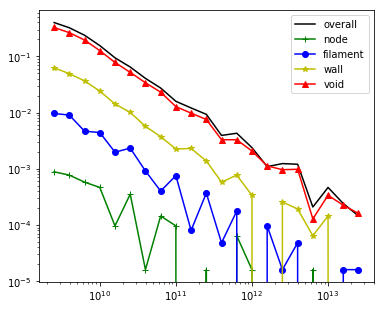

In [70]:
fig,ax= plt.subplots(figsize=(6,5))
xall,yall=plotmass_n(mass)
xh,yh=plotmass_n(mass_cluster)
xf,yf=plotmass_n(mass_fg)
xw,yw=plotmass_n(mass_wg)
xv,yv=plotmass_n(mass_vg)
plt.plot(xall,yall,"k-",label="overall")
plt.plot(xh,yh,"g+-",label="node")
plt.plot(xf,yf,"bo-",label="filament")
plt.plot(xw,yw,"y*-",label="wall")
plt.plot(xv,yv,"r^-",label="void")
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')